# 2.92_bounding_boxes
- annochi の bounding boxes を [xmin, ymin, xmax, ymax, label] 形式にできると学習が可能になる
- ので１つ持ってきて、それをやる

In [35]:
from google.colab import auth
auth.authenticate_user()

ModuleNotFoundError: No module named 'google'

In [37]:
!gsutil auth login

Did you mean this?
	queryauth
CommandException: Invalid command "auth".


In [38]:
!gsutil ls gs://bkt-orama-anocci-prod/caddi/object-views/annots/object-view/

AccessDeniedException: 403 vertex-ai@ai-lab-sandbox.iam.gserviceaccount.com does not have storage.objects.list access to the Google Cloud Storage bucket.


In [ ]:
vertex-ai@ai-lab-sandbox.iam.gserviceaccount.com に　caddi-dev-

In [2]:
!gsutil ls gs://orama-dev-store

AccessDeniedException: 403 vertex-ai@ai-lab-sandbox.iam.gserviceaccount.com does not have storage.objects.list access to the Google Cloud Storage bucket.


In [40]:
!gsutil ls gs://

gs://dev-kawai/
gs://material_shape_clf_dataset/
gs://similar-drawings/


In [4]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [48]:
with open("0000.json", 'w') as f:
    json.dump(annotation_json, f)

In [5]:
annotation_json = """{"image_dimensions":[4963,3509],"arrows":[],"dimensions":[],"triangle_rows":[],"old_jis_surface_roughnesses":[],"new_jis_surface_roughnesses":[],"dimension_boxes":[],"object_views":[{"x":{"lower":1035.650390625,"upper":3533.10400390625},"y":{"lower":1038.4969482421875,"upper":2263.541015625}}]}"""

In [6]:
import json

In [9]:
annotation_dict = json.loads(annotation_json)

In [10]:
annotation_dict

{'image_dimensions': [4963, 3509],
 'arrows': [],
 'dimensions': [],
 'triangle_rows': [],
 'old_jis_surface_roughnesses': [],
 'new_jis_surface_roughnesses': [],
 'dimension_boxes': [],
 'object_views': [{'x': {'lower': 1035.650390625, 'upper': 3533.10400390625},
   'y': {'lower': 1038.4969482421875, 'upper': 2263.541015625}}]}

In [31]:
from __future__ import annotations

def get_view(annotation_dict) -> list:
    # [xmin, ymin, xmax, ymax, label] 形式に
    x = annotation_dict['image_dimensions'][0]
    y = annotation_dict['image_dimensions'][1]

    views = []
    for object_view in annotation_dict['object_views']:
        xmin = object_view['x']['lower']
        xmax = object_view['x']['upper']
        ymin = object_view['y']['lower']
        ymax = object_view['y']['upper']

        views.append([xmin/x, ymin/y, xmax/x, ymax/y, 1])
    return views

def get_box(annotation_dict) -> list:
    boxes = []
    for object_view in annotation_dict['object_views']:
        xmin = object_view['x']['lower']
        xmax = object_view['x']['upper']
        ymin = object_view['y']['lower']
        ymax = object_view['y']['upper']

        boxes.append([xmin, ymin, xmax, ymax, 1])
    return boxes 

In [32]:
get_box(annotation_dict)

[[1035.650390625, 1038.4969482421875, 3533.10400390625, 2263.541015625, 1]]

In [15]:
get_view(annotation_dict)

[[0.20867426770602457,
  0.29595239334345613,
  0.7118887777365001,
  0.6450672600812197,
  1]]

In [28]:
def vis_bbox(rgb_img, bbox, label_index):
    """
    物体検出の予測結果を画像で表示させる関数。

    Parameters
    ----------
    rgb_img:rgbの画像
        対象の画像データ
    bbox: list
        物体のBBoxのリスト
    label_index: list
        物体のラベルへのインデックス
    """
    # 枠の色の設定
    num_classes = 1
    colors = plt.cm.hsv(np.linspace(0, 1, num_classes)).tolist()

    # 画像の表示
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_img)
    currentAxis = plt.gca()

    # BBox分のループ
    for i, bb in enumerate(bbox):

        # ラベル名
        color = colors[label_index[i]]  # クラスごとに別の色の枠を与える

        # 枠の座標
        xy = (bb[0], bb[1])
        width = bb[2] - bb[0]
        height = bb[3] - bb[1]

        # 長方形を描画する
        currentAxis.add_patch(plt.Rectangle(
            xy, width, height, fill=False, edgecolor=color, linewidth=2))

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

num_classes = 1
    colors = plt.cm.hsv(np.linspace(0, 1, num_classes)).tolist()

In [33]:
# bbox = get_view(annotation_dict)
bbox = get_box(annotation_dict)

In [23]:
for bb in get_view(annotation_dict):
    xy = (bb[0], bb[1])
    width = bb[2] - bb[0]
    height = bb[3] - bb[1]
    pass

In [22]:
bb[0]

0.20867426770602457

In [17]:
img = cv2.imread("0000.png")

NameError: name 'color' is not defined

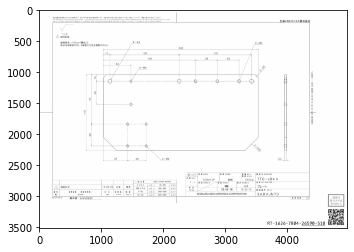

In [24]:
plt.imshow(img)
currentAxis = plt.gca()
currentAxis.add_patch(plt.Rectangle(
            xy, width, height, fill=False, edgecolor=color, linewidth=2))

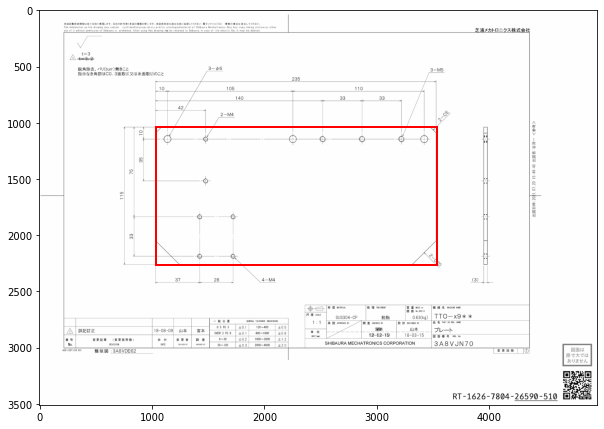

In [34]:
vis_bbox(img, bbox, [0])